# Project: Food Deserts Influence Larceny Rates

#### We are predicting whether or not a community is at risk for higher rates of larceny based on the amount of food deserts per population.

In [373]:
# import starter packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1207]:
df = pd.read_csv('crimedata2.csv') # read csv into pandas

In [1209]:
#YASMEEN
#df=pd.read_csv("/Users/macuser/Documents/DTSC3601/crimedata2.csv")

In [1211]:
df # glance at dataframe

Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1          23123           2.82          0.80         95.57          3.44   
2          29344           2.43          0.74         94.33          3.43   
3          16656           2.40          1.70         97.35          0.50   
4          11245           2.76          0.53         89.16          1.17   
...          ...            ...           ...           ...           ...   
2210       56216           3.07          6.87         61.68         15.23   
2211       12251           2.68         21.18         76.65          1.52   
2212       32824           2.46          0.52         92.62          0.98   
2213       13547           2.89          3.37         69.91          0.90   
2214       28898           2.61          2.39         71.27          9.09   

      ...  burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  \
0     ...          14       114.85        138     1132.08         16   
1     ...          57       242.37        376     1598.78         26   
2     ...         274       758.14       1797     4972.19        136   
3     ...         225      1301.78        716     4142.56         47   
4     ...          91       728.93       1060     8490.87         91   
...   ...         ...          ...        ...         ...        ...   
2210  ...        1376      2268.72       2563     4225.82        489   
2211  ...         104       860.43        574      4748.9         24   
2212  ...         628      1709.26        895     2435.97        179   
2213  ...         192      1508.01        474      3722.9         13   
2214  ...         791      2614.53       1458      4819.2        405   

      autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  \
0              131.26       2         16.41                41.02   
1              110.55       1          4.25               127.56   
2               376.3      22         60.87               218.59   
3              271.93       ?             ?               306.64   
4              728.93       5         40.05                    ?   
...               ...     ...           ...                  ...   
2210           806.25      34         56.06               545.75   
2211           198.56       2         16.55                124.1   
2212           487.19       8         21.77               353.83   
2213            102.1       1          7.85               691.17   
2214          1338.67      20         66.11               918.89   

      nonViolPerPop  
0           1394.59  
1           1955.95  
2           6167.51  
3                 ?  
4           9988.79  
...             ...  
2210        7356.84  
2211        5824.44  
2212         4654.2  
2213        5340.87  
2214         8838.5  

[2215 rows x 147 columns]

In [1213]:
df.shape # number of (rows, columns)

(2215, 147)

In [1215]:
df.describe() # count, max, min, std, mean

fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623     6.181517     5.970747  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.620000     0.930000    12.250000    24.415000    11.320000  ...   
50%        1.230000     2.180000    13.620000    26.780000    12.540000  ...   
75%        2.670000     7.810000    15.360000    29.205000    14.345000  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count       2215.000000     2215.000000    2215.000000     2215.000000   
mean          61.539630       51.538596      77.411079       88.111865   
std           16.750061       10.517926      10.878186        7.287836   
min            6.750000       11.830000      27.950000       32.830000   
25%           50.110000       44.995000      72.060000       85.200000   
50%           64.490000       52.170000      79.490000       90.030000   
75%           74.855000       58.740000      85.135000       93.010000   
max           93.140000       78.560000      96.590000       99.900000   

          LandArea       PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  2215.000000   2215.000000     2215.000000          2215.000000   
mean     27.419955   2783.835034        3.041124             0.980163   
std     109.822600   2828.993341        4.912917             2.877128   
min       0.900000     10.000000        0.000000             0.000000   
25%       7.300000   1181.900000        0.360000             0.000000   
50%      13.700000   2027.300000        1.220000             0.000000   
75%      26.100000   3321.700000        3.365000             0.000000   
max    3569.800000  44229.900000       54.330000            48.440000   

           murders   murdPerPop  
count  2215.000000  2215.000000  
mean      7.764786     5.859296  
std      58.166468     9.156829  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     2.170000  
75%       3.000000     8.365000  
max    1946.000000    91.090000  

[8 rows x 104 columns]

In [1217]:
# Make list of columns to remove
columns_to_remove = [
# Race variables
'racepctblack', 'racePctAsian', 'racePctHisp', 'whitePerCap',
'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'RacialMatchCommPol',
# Crime-related variables
'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop',
'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'autoTheft',
'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop',
# Gender-related variables
'MalePctNevMarr', 
# Police-related variables
'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'PctPolicWhite', 'PctPolicBlack',
'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
'LemasPctOfficDrugUn', 'PolicBudgPerPop'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Display the remaining columns to verify
print("Remaining columns after removal:")
print(df.columns)

Remaining columns after removal:
Index(['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racePctWhite', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeak

In [1219]:
df.isna().sum() # sum of all null values in each column

Êcommunityname    0
state             0
countyCode        0
communityCode     0
fold              0
                 ..
LandArea          0
PopDens           0
PctUsePubTrans    0
larcenies         0
larcPerPop        0
Length: 98, dtype: int64

WHY is that zero for nearly every column???????

In [1222]:
df.head()

Êcommunityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR          ?             ?     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racePctWhite  agePct12t21  agePct12t29  ...  PctForeignBorn  \
0           3.10         91.78        12.47        21.44  ...           10.66   
1           2.82         95.57        11.01        21.30  ...            8.30   
2           2.43         94.33        11.36        25.88  ...            5.00   
3           2.40         97.35        12.55        25.20  ...            2.04   
4           2.76         89.16        24.46        40.53  ...            1.74   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0             53.72           65.29          78.09           89.14       6.5   
1             77.17           71.27          90.22           96.12      10.6   
2             44.77           36.60          61.26           82.85      10.6   
3             88.71           56.70          90.17           96.24       5.2   
4             73.75           42.22          60.34           89.02      11.5   

   PopDens  PctUsePubTrans  larcenies  larcPerPop  
0   1845.9            9.63        138     1132.08  
1   2186.7            3.84        376     1598.78  
2   2780.9            4.37       1797     4972.19  
3   3217.7            3.31        716     4142.56  
4    974.2            0.38       1060     8490.87  

[5 rows x 98 columns]

Oh, it is because nearly every missing item is a '?' instead of a null value, lets fix that!

In [1225]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [1227]:
df.dtypes # data types of each column

Êcommunityname     object
state              object
countyCode         object
communityCode      object
fold                int64
                   ...   
LandArea          float64
PopDens           float64
PctUsePubTrans    float64
larcenies          object
larcPerPop         object
Length: 98, dtype: object

In [1229]:
# viewing all columns with their datatypes as a list of tuples
data_types = [(col, df[col].dtype) for col in df.columns]

# print the list of column names with their datatypes
for col, dtype in data_types:
    print(f"{col}: {dtype}")

Êcommunityname: object
state: object
countyCode: object
communityCode: object
fold: int64
population: int64
householdsize: float64
racePctWhite: float64
agePct12t21: float64
agePct12t29: float64
agePct16t24: float64
agePct65up: float64
numbUrban: int64
pctUrban: float64
medIncome: int64
pctWWage: float64
pctWFarmSelf: float64
pctWInvInc: float64
pctWSocSec: float64
pctWPubAsst: float64
pctWRetire: float64
medFamInc: int64
perCapInc: int64
NumUnderPov: int64
PctPopUnderPov: float64
PctLess9thGrade: float64
PctNotHSGrad: float64
PctBSorMore: float64
PctUnemployed: float64
PctEmploy: float64
PctEmplManu: float64
PctEmplProfServ: float64
PctOccupManu: float64
PctOccupMgmtProf: float64
MalePctDivorce: float64
FemalePctDiv: float64
TotalPctDiv: float64
PersPerFam: float64
PctFam2Par: float64
PctKids2Par: float64
PctYoungKids2Par: float64
PctTeen2Par: float64
PctWorkMomYoungKids: float64
PctWorkMom: float64
NumKidsBornNeverMar: int64
PctKidsBornNeverMar: float64
NumImmig: int64
PctImmigRecent

In [1231]:
# List of columns to convert to numeric
columns_to_convert = [
    'larcenies', 'larcPerPop'
]

In [1233]:
# Convert these columns to numeric, forcing invalid values to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

# make sure the conversion worked
print(df[columns_to_convert].dtypes)

larcenies     float64
larcPerPop    float64
dtype: object


In [1235]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
countyCode: 1221
communityCode: 1224
fold: 0
population: 0
householdsize: 0
racePctWhite: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRen

In [1237]:
percent_null = 40.0
min_count =  int(((100-percent_null)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [1239]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
racePctWhite: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRentOccHous: 0
PctPersOwnOccup: 0
PctPer

In [1240]:
# Come back to this
mean_values = df.mean(numeric_only=True)

df_filled = df.fillna(mean_values)

df = df_filled

In [1241]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
racePctWhite: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHouseOccup: 0
PersPerOccupHous: 0
PersPerOwnOccHous: 0
PersPerRentOccHous: 0
PctPersOwnOccup: 0
PctPer

In [1242]:
df.columns.tolist() # list of total columns for reference since .columns only shows so many

['Êcommunityname',
 'state',
 'fold',
 'population',
 'householdsize',
 'racePctWhite',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctLargHouseFam',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerO

In [1243]:
df.describe()

fold    population  householdsize  racePctWhite  agePct12t21  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000  2215.000000   
mean      5.494357  5.311798e+04       2.707327     83.979819    14.445837   
std       2.872924  2.046203e+05       0.334120     16.419080     4.518623   
min       1.000000  1.000500e+04       1.600000      2.680000     4.580000   
25%       3.000000  1.436600e+04       2.500000     76.320000    12.250000   
50%       5.000000  2.279200e+04       2.660000     90.350000    13.620000   
75%       8.000000  4.302400e+04       2.850000     96.225000    15.360000   
max      10.000000  7.322564e+06       5.280000     99.630000    54.400000   

       agePct12t29  agePct16t24   agePct65up     numbUrban     pctUrban  ...  \
count  2215.000000  2215.000000  2215.000000  2.215000e+03  2215.000000  ...   
mean     27.644840    13.975142    11.836393  4.773472e+04    70.465309  ...   
std       6.181517     5.970747     4.777565  2.056067e+05    44.080275  ...   
min       9.380000     4.640000     1.660000  0.000000e+00     0.000000  ...   
25%      24.415000    11.320000     8.750000  0.000000e+00     0.000000  ...   
50%      26.780000    12.540000    11.730000  1.804100e+04   100.000000  ...   
75%      29.205000    14.345000    14.415000  4.191800e+04   100.000000  ...   
max      70.510000    63.620000    52.770000  7.322564e+06   100.000000  ...   

       PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
count     2215.000000       2215.000000     2215.000000    2215.000000   
mean         7.340302         61.539630       51.538596      77.411079   
std          8.418476         16.750061       10.517926      10.878186   
min          0.180000          6.750000       11.830000      27.950000   
25%          2.060000         50.110000       44.995000      72.060000   
50%          4.310000         64.490000       52.170000      79.490000   
75%          9.250000         74.855000       58.740000      85.135000   
max         60.400000         93.140000       78.560000      96.590000   

       PctSameState85     LandArea       PopDens  PctUsePubTrans  \
count     2215.000000  2215.000000   2215.000000     2215.000000   
mean        88.111865    27.419955   2783.835034        3.041124   
std          7.287836   109.822600   2828.993341        4.912917   
min         32.830000     0.900000     10.000000        0.000000   
25%         85.200000     7.300000   1181.900000        0.360000   
50%         90.030000    13.700000   2027.300000        1.220000   
75%         93.010000    26.100000   3321.700000        3.365000   
max         99.900000  3569.800000  44229.900000       54.330000   

           larcenies    larcPerPop  
count    2215.000000   2215.000000  
mean     2137.629295   3372.979150  
std      7595.422279   1900.027554  
min        10.000000     77.860000  
25%       392.500000   2040.740000  
50%       748.000000   3081.630000  
75%      1676.500000   4334.675000  
max    235132.000000  25910.550000  

[8 rows x 94 columns]

## Correlations (Positive and Negative)

In [1245]:
# Create a heatmap starting at the 5th index
df_subset = df.iloc[5:]

# Correlation
plt.figure(figsize=(100,100))
sns.heatmap(df_subset.corr(numeric_only=True),annot=True)
plt.title('Correlation of Attributes')
plt.show()

In [1246]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['larcPerPop'].sort_values(ascending=False)
print(correlation_with_target.head(25)) # top 25 variables correlated to larcPerPop

larcPerPop             1.000000
TotalPctDiv            0.525188
MalePctDivorce         0.514170
FemalePctDiv           0.511368
PctPopUnderPov         0.452417
PctHousNoPhone         0.450435
PctKidsBornNeverMar    0.409319
PctHousLess3BR         0.389260
pctWPubAsst            0.353609
PctUnemployed          0.293820
PctNotHSGrad           0.287266
PctImmigRec10          0.234904
PctVacantBoarded       0.226246
PctLess9thGrade        0.221941
PctImmigRec8           0.212130
PctOccupManu           0.193128
PctImmigRec5           0.189110
PctWOFullPlumb         0.182142
pctWSocSec             0.174515
larcenies              0.174193
PctImmigRecent         0.169467
MedRentPctHousInc      0.150451
agePct65up             0.145530
HousVacant             0.123576
PctPersDenseHous       0.118873
Name: larcPerPop, dtype: float64


In [1247]:
print(correlation_with_target.tail(25)) # top negatively correlated variables to larcPerPop

PctHousOccup        -0.263105
PersPerOccupHous    -0.264056
PctEmploy           -0.277274
RentQrange          -0.279891
pctWWage            -0.306484
OwnOccHiQuart       -0.307836
perCapInc           -0.309160
OwnOccMedVal        -0.320958
racePctWhite        -0.321352
PersPerOwnOccHous   -0.321699
MedNumBR            -0.324523
OwnOccLowQuart      -0.334841
RentLowQ            -0.356627
RentMedian          -0.375966
RentHighQ           -0.377599
MedRent             -0.382933
pctWInvInc          -0.386698
PctHousOwnOcc       -0.393558
PctPersOwnOccup     -0.420521
medFamInc           -0.435318
medIncome           -0.454502
PctTeen2Par         -0.509333
PctYoungKids2Par    -0.516231
PctKids2Par         -0.544812
PctFam2Par          -0.549538
Name: larcPerPop, dtype: float64


# Create Variable pctMinority

In [1254]:
# Create the pctMinority variable
df['pctMinority'] = 100 - df['racePctWhite']

null_minority = df['pctMinority'].isnull().sum()
print(f"Number of null values in pctMinority: {null_minority}")
df['pctMinority']

Number of null values in pctMinority: 0


0        8.22
1        4.43
2        5.67
3        2.65
4       10.84
        ...  
2210    38.32
2211    23.35
2212     7.38
2213    30.09
2214    28.73
Name: pctMinority, Length: 2215, dtype: float64

# Outliers

In [1255]:
# List of columns to analyze
columns = ['HousVacant', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst', 'perCapInc', 'pctMinority', 'larcPerPop']

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(25, 5))
fig.suptitle("Box Plots Before and After Outlier Removal", fontsize=16)

# Box plots for original data (before outlier removal)
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[0, i])
    axes[0, i].set_title(f'Original: {col}')

# Create a copy of the original DataFrame for outlier removal
df_filtered = df.copy()

# Apply IQR filtering with custom multipliers if needed
multiplier = 1.8  # Adjust the multiplier (use a lower value to decrease the cutoff)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select all numeric columns
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    # Filter rows within bounds
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

# Box plots for filtered data (after outlier removal)
for i, col in enumerate(columns):
    sns.boxplot(data=df_filtered, x=col, ax=axes[1, i])
    axes[1, i].set_title(f'Filtered: {col}')

# Label the y-axis for clarity
axes[0, 0].set_ylabel("Before Outlier Removal")
axes[1, 0].set_ylabel("After Outlier Removal")

# Adjust layout and make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [1261]:
df=df_filtered

# Sklearn Feature Importance

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [1263]:
# define target and features
X = df.drop(columns=['larcPerPop', 'Êcommunityname', 'state']) # drop target column and columns with strings
y = df['larcPerPop'] # target column

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1265]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1266]:
importances = rf.feature_importances_.argsort()

feature_names = X.columns

In [1267]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

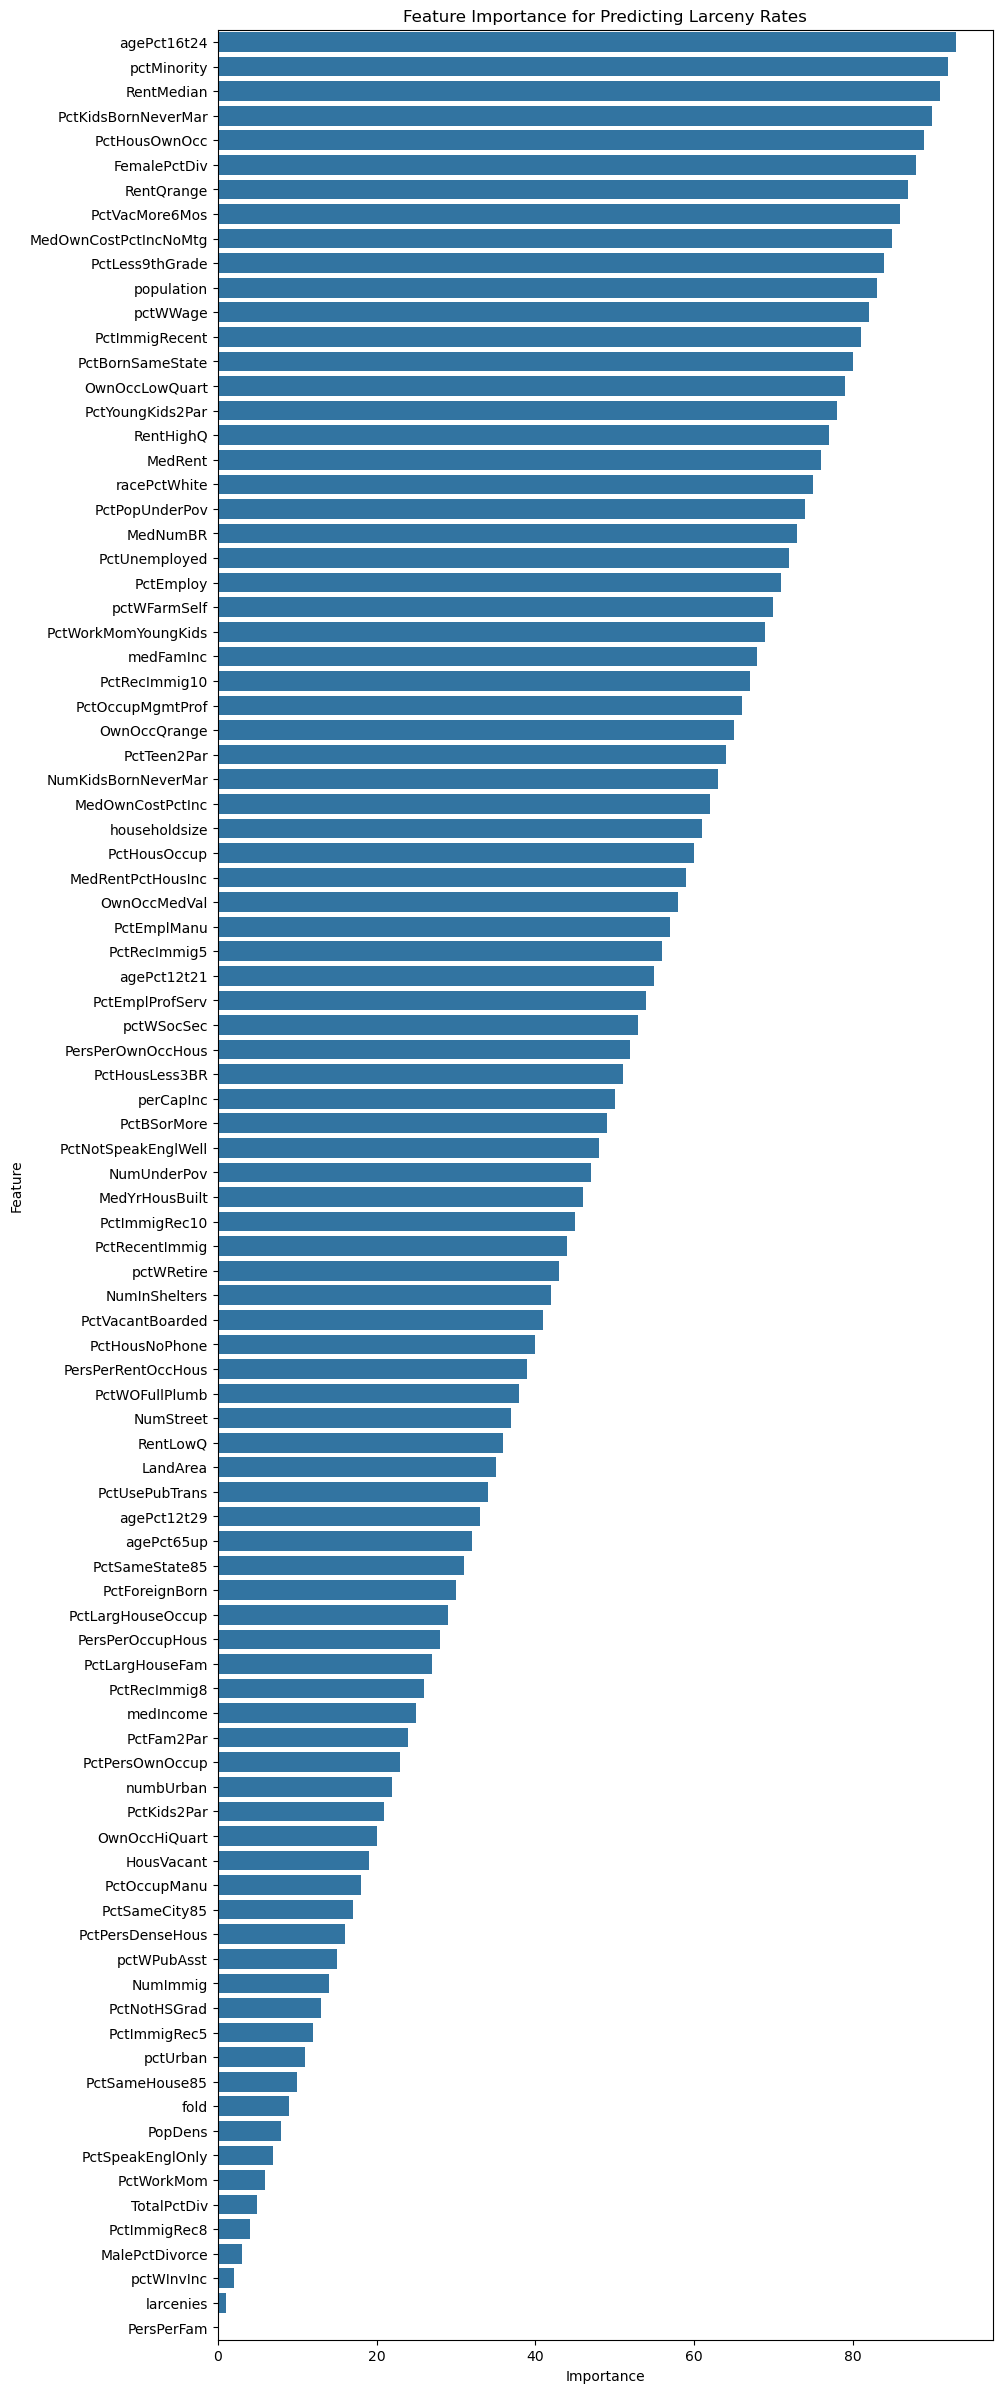

In [1268]:
# Plot feature importance
plt.figure(figsize=(10,30))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Larceny Rates')
plt.show()

# New Variable: PctLarcPerPop

In [1274]:
df['PctLarcPerPop'] = (df['larcPerPop'] / df['population']) * 100 #Creates a new column that divides larcPerPop by Population

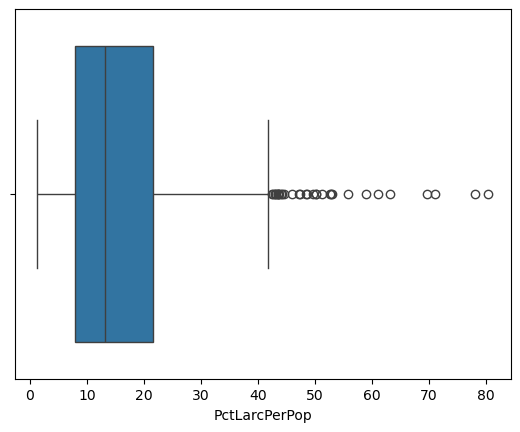

In [1276]:
sns.boxplot(x=df['PctLarcPerPop'])
plt.show() 

# Boxplot for the new variable created

In [1278]:
df.head(5)

Êcommunityname state  fold  population  householdsize  racePctWhite  \
1     Marpletownship    PA     1       23123           2.82         95.57   
2         Tigardcity    OR     1       29344           2.43         94.33   
3   Gloversvillecity    NY     1       16656           2.40         97.35   
7       Andersoncity    IN     1       59459           2.45         84.87   
10       Shermancity    TX     1       31601           2.54         83.22   

    agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  PctSameHouse85  \
1         11.01        21.30        10.48       17.18  ...           71.27   
2         11.36        25.88        11.01       10.28  ...           36.60   
3         12.55        25.20        12.19       17.57  ...           56.70   
7         15.31        27.93        14.78       14.60  ...           54.85   
10        15.73        28.57        15.16       14.26  ...           44.95   

    PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  \
1           90.22           96.12      10.6   2186.7            3.84   
2           61.26           82.85      10.6   2780.9            4.37   
3           90.17           96.24       5.2   3217.7            3.31   
7           85.55           91.51      39.2   1515.3            0.70   
10          74.82           88.66      38.7    816.1            0.00   

    larcenies  larcPerPop  pctMinority  PctLarcPerPop  
1       376.0     1598.78         4.43       6.914241  
2      1797.0     4972.19         5.67      16.944486  
3       716.0     4142.56         2.65      24.871278  
7      2250.0     3691.79        15.13       6.208968  
10     1817.0     5654.80        16.78      17.894370  

[5 rows x 98 columns]

In [1280]:
df['PctLarcPerPop'].describe()

count    883.000000
mean      16.069249
std       11.201066
min        1.294074
25%        7.926631
50%       13.231943
75%       21.568863
max       80.426606
Name: PctLarcPerPop, dtype: float64

In [1539]:
model_df = df[['HousVacant', 'PctLarcPerPop', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst', 'perCapInc', 'pctMinority']]

In [1541]:
model_df.head()

HousVacant  PctLarcPerPop  PctPopUnderPov  NumUnderPov  MedRent  \
1          240       6.914241            3.98          885      627   
2          544      16.944486            4.75         1389      484   
3          669      24.871278           17.23         2831      333   
7         2051       6.208968           17.98        10320      338   
10        1807      17.894370           15.61         4698      380   

    medFamInc  PctUnemployed  pctWPubAsst  perCapInc  pctMinority  
1       55323           2.43         2.75      20148         4.43  
2       42112           4.01         2.94      16946         5.67  
3       26501           9.86        11.71      10810         2.65  
7       28901           8.19         8.81      12161        15.13  
10      29509           7.19         7.02      12929        16.78

In [1542]:
# Over 21.57% larc per pop is considered high risk since 75% of data falls below
category = pd.cut(model_df.PctLarcPerPop,bins=[0,7.93,21.57,81],labels=['Low-Risk','Medium-Risk','High-Risk'])

In [1543]:
model_df.insert(8,'PctLarcPerPopRisk',category)

In [1544]:
model_df = model_df.drop(columns='PctLarcPerPop', axis=1)

In [1545]:
model_df.dropna(how='any')

HousVacant  PctPopUnderPov  NumUnderPov  MedRent  medFamInc  \
1            240            3.98          885      627      55323   
2            544            4.75         1389      484      42112   
3            669           17.23         2831      333      26501   
7           2051           17.98        10320      338      28901   
10          1807           15.61         4698      380      29509   
...          ...             ...          ...      ...        ...   
2204         433            7.01         1620      466      39266   
2206        1419           18.48         3955      305      28888   
2209         126            4.33          458      651      44587   
2211         523           20.79         2364      330      25000   
2212         957            7.56         2460      514      34973   

      PctUnemployed  pctWPubAsst PctLarcPerPopRisk  perCapInc  pctMinority  
1              2.43         2.75          Low-Risk      20148         4.43  
2              4.01         2.94       Medium-Risk      16946         5.67  
3              9.86        11.71         High-Risk      10810         2.65  
7              8.19         8.81          Low-Risk      12161        15.13  
10             7.19         7.02       Medium-Risk      12929        16.78  
...             ...          ...               ...        ...          ...  
2204           5.61         7.11         High-Risk      13576         5.28  
2206           7.18         7.48       Medium-Risk      11906        10.58  
2209           4.13         5.43       Medium-Risk      16201         1.52  
2211           7.90         8.85         High-Risk       9995        23.35  
2212           5.18         9.01          Low-Risk      14131         7.38  

[883 rows x 10 columns]

In [1546]:
model_df['PctLarcPerPopRisk'].value_counts()

PctLarcPerPopRisk
Medium-Risk    441
Low-Risk       221
High-Risk      221
Name: count, dtype: int64

In [1547]:
model_df.dtypes

HousVacant              int64
PctPopUnderPov        float64
NumUnderPov             int64
MedRent                 int64
medFamInc               int64
PctUnemployed         float64
pctWPubAsst           float64
PctLarcPerPopRisk    category
perCapInc               int64
pctMinority           float64
dtype: object

In [1548]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
perCapInc            0
pctMinority          0
dtype: int64

In [1549]:
model_df.dropna()

HousVacant  PctPopUnderPov  NumUnderPov  MedRent  medFamInc  \
1            240            3.98          885      627      55323   
2            544            4.75         1389      484      42112   
3            669           17.23         2831      333      26501   
7           2051           17.98        10320      338      28901   
10          1807           15.61         4698      380      29509   
...          ...             ...          ...      ...        ...   
2204         433            7.01         1620      466      39266   
2206        1419           18.48         3955      305      28888   
2209         126            4.33          458      651      44587   
2211         523           20.79         2364      330      25000   
2212         957            7.56         2460      514      34973   

      PctUnemployed  pctWPubAsst PctLarcPerPopRisk  perCapInc  pctMinority  
1              2.43         2.75          Low-Risk      20148         4.43  
2              4.01         2.94       Medium-Risk      16946         5.67  
3              9.86        11.71         High-Risk      10810         2.65  
7              8.19         8.81          Low-Risk      12161        15.13  
10             7.19         7.02       Medium-Risk      12929        16.78  
...             ...          ...               ...        ...          ...  
2204           5.61         7.11         High-Risk      13576         5.28  
2206           7.18         7.48       Medium-Risk      11906        10.58  
2209           4.13         5.43       Medium-Risk      16201         1.52  
2211           7.90         8.85         High-Risk       9995        23.35  
2212           5.18         9.01          Low-Risk      14131         7.38  

[883 rows x 10 columns]

In [1550]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
perCapInc            0
pctMinority          0
dtype: int64

In [1553]:
# Convert the 'PctLarcPerPopRisk' column to string
model_df['PctLarcPerPopRisk'] = model_df['PctLarcPerPopRisk'].astype(str)

# Dummy Model (Baseline)

In [1557]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [1559]:
# define feature set and target set
X = model_df.drop(columns = ['PctLarcPerPopRisk']) # features used to predict class
y = model_df['PctLarcPerPopRisk'] # what we are trying to predict

In [1561]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [1564]:
dummy_clf.predict(X)

array(['Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Ri

In [1572]:
dummy_clf.score(X, y)

0.49943374858437145

# Model 1- Decision Tree Classifier

In [1575]:
# define feature set and target set
X = model_df.drop(columns = ['PctLarcPerPopRisk']) # features used to predict class
y = model_df['PctLarcPerPopRisk'] # what we are trying to predict

In [1577]:
from sklearn.model_selection import train_test_split

In [1579]:
# perform train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 ) #70% train, 30% test

In [1581]:
# print shape to see how many in train/test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(618, 9) (265, 9) (618,) (265,)


In [1583]:
from sklearn import tree

In [1585]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [1587]:
model_df.isna().sum()

HousVacant           0
PctPopUnderPov       0
NumUnderPov          0
MedRent              0
medFamInc            0
PctUnemployed        0
pctWPubAsst          0
PctLarcPerPopRisk    0
perCapInc            0
pctMinority          0
dtype: int64

In [1589]:
clf = clf.fit(X_train, y_train) #fit training data to the model

## Model 1 Evaluation

In [1592]:
from sklearn import metrics
import numpy as np

In [1594]:
#predict values from X_test
predicted = clf.predict(X_test)

In [1596]:
predicted

array(['Medium-Risk', 'Low-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Low-Risk',
       'Medium-Risk', 'Medium-Risk', 'High-Risk', 'High-Risk',
       'High-Risk', 'High-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'High-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'High-Risk', 'Low-Risk', 'High-Risk',
       'High-Risk', 'Low-Risk', 'Medium-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'High-Risk', 'Low-Risk', 'High-Risk', 'Low-Risk',
       'Medium-Risk', 'Medium-Risk', 'High-Risk', 'High-Risk', 'Low-Risk',
       'High-Risk', 'Low-Risk', 'High-Risk', 'High-Risk', 'Medium-Risk',
       'High-Risk', 'High-Risk', 'High-Risk', 'High-Risk', 'Medium-Risk',
       'Medium-Risk', 'High-Risk', 'High-Risk', 'Medium-Risk', 'Low-Risk',
       'High-Risk', 'Low-Risk', 'Low-Risk', 'High-Risk', 'High-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Low-Ri

In [1598]:
clf.score(X_test, y_test)

0.49056603773584906

In [1599]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   High-Risk       0.38      0.49      0.43        72
    Low-Risk       0.55      0.49      0.52        55
 Medium-Risk       0.55      0.49      0.52       138

    accuracy                           0.49       265
   macro avg       0.49      0.49      0.49       265
weighted avg       0.50      0.49      0.49       265



# Model 2- Decision Tree C5.0

## Iterating through max_leaf_nodes and evaluating different parameters

In [691]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [1603]:
best_max_leaf_nodes = 2
best_accuracy = 0
best_pred = None  # Store predictions of the best model

# Iterate through max_leaf_nodes values from 1 to 100
for leaf_nodes in range(2, 100):  # Include 100
    # Initialize and train the model with the current max_leaf_nodes
    clf50 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=leaf_nodes).fit(X_train, y_train)
    
    # Make predictions on the test set
    pred_clf50 = clf50.predict(X_test)
    
    # Calculate accuracy
    accuracy_clf50_test = accuracy_score(y_test, pred_clf50)
    
    # Update the best max_leaf_nodes if the current model has better accuracy
    if accuracy_clf50_test > best_accuracy:
        best_accuracy = accuracy_clf50_test
        best_max_leaf_nodes = leaf_nodes  # Correct variable name
        best_pred = pred_clf50  # Save the predictions for the best model

# Print the best max_leaf_nodes and corresponding accuracy
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred))  # Correct variable name


Best max_leaf_nodes: 7, with Accuracy: 0.6377
              precision    recall  f1-score   support

   High-Risk       0.60      0.71      0.65        72
    Low-Risk       0.62      0.45      0.53        55
 Medium-Risk       0.66      0.67      0.67       138

    accuracy                           0.64       265
   macro avg       0.63      0.61      0.62       265
weighted avg       0.64      0.64      0.63       265



# Model 3- Decision Tree CART

In [1605]:
best_max_leaf_nodes = 2
best_accuracy = 0
best_pred = None  # Store predictions of the best model

# Iterate through max_leaf_nodes values from 1 to 100
for leaf_nodes in range(2, 50):  # Include 100
    # Initialize and train the model with the current max_leaf_nodes
    cart01 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=leaf_nodes).fit(X_train, y_train)
    
    # Make predictions on the test set
    pred = cart01.predict(X_test)
    
    # Calculate accuracy
    accuracy_cart01_test = accuracy_score(y_test, pred)
    
    # Update the best max_leaf_nodes if the current model has better accuracy
    if accuracy_cart01_test > best_accuracy:
        best_accuracy = accuracy_cart01_test
        best_max_leaf_nodes = leaf_nodes  # Correct variable name
        best_pred = pred  # Save the predictions for the best model

# Print the best max_leaf_nodes and corresponding accuracy
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred))  # Correct variable name


Best max_leaf_nodes: 8, with Accuracy: 0.6226
              precision    recall  f1-score   support

   High-Risk       0.62      0.42      0.50        72
    Low-Risk       0.63      0.47      0.54        55
 Medium-Risk       0.62      0.79      0.69       138

    accuracy                           0.62       265
   macro avg       0.63      0.56      0.58       265
weighted avg       0.62      0.62      0.61       265



# Model 4- Random Forest

In [1350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_n_estimators = 1
best_accuracy = 0
best_pred_rf = None  # Store predictions of the best model

# Iterate through n_estimators values from 1 to 100
for n_estimators in range(1, 101):
    # Initialize and train model with current n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion="gini").fit(X_train, y_train)
    
    # Make predictions on test set
    pred_rf = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy_rf_test = accuracy_score(y_test, pred_rf)
    
    # Update best n_estimators if current model has better accuracy
    if accuracy_rf_test > best_accuracy:
        best_accuracy = accuracy_rf_test
        best_n_estimators = n_estimators
        best_pred_rf = pred_rf  # Save the predictions for the best model

# Print the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred_rf))


Best n_estimators: 50, with Accuracy: 0.6755
              precision    recall  f1-score   support

   High-Risk       0.73      0.55      0.63        74
    Low-Risk       0.74      0.57      0.64        60
 Medium-Risk       0.64      0.79      0.71       131

    accuracy                           0.68       265
   macro avg       0.70      0.64      0.66       265
weighted avg       0.69      0.68      0.67       265



In [1351]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_n_estimators = 1
best_accuracy = 0
best_pred_rf = None  # Store predictions of the best model

# Iterate through n_estimators values from 1 to 100
for n_estimators in range(1, 101):
    # Initialize and train model with current n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy").fit(X_train, y_train)
    
    # Make predictions on test set
    pred_rf = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy_rf_test = accuracy_score(y_test, pred_rf)
    
    # Update best n_estimators if current model has better accuracy
    if accuracy_rf_test > best_accuracy:
        best_accuracy = accuracy_rf_test
        best_n_estimators = n_estimators
        best_pred_rf = pred_rf  # Save the predictions for the best model

# Print the best n_estimators and corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}, with Accuracy: {best_accuracy:.4f}")

# Print classification report for the best model
print(classification_report(y_test, best_pred_rf))


Best n_estimators: 66, with Accuracy: 0.6717
              precision    recall  f1-score   support

   High-Risk       0.73      0.51      0.60        74
    Low-Risk       0.70      0.67      0.68        60
 Medium-Risk       0.64      0.76      0.70       131

    accuracy                           0.67       265
   macro avg       0.69      0.65      0.66       265
weighted avg       0.68      0.67      0.67       265



# Model 5- Linear Regression

#### This is using 'PctLarcPerPop' as the target variable in order to have a continuous variable instead of a categorical one. Just for extra insight

In [708]:
# Import necessary libraries for regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

In [1354]:
lr_df = df[['HousVacant', 'PctLarcPerPop', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst', 'perCapInc', 'pctMinority']]

In [1356]:
X_lr = lr_df.drop(columns=['PctLarcPerPop'])  # Dropping target variable from features
y_lr = lr_df['PctLarcPerPop']

In [1358]:
# Instantiate the linear regression model
lr = LinearRegression()

# define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [1360]:
# R-squared scores across the 5 folds
r2_scores = cross_val_score(lr, X_lr, y_lr, cv=kf, scoring='r2')

# MSE and RMSE across folds using make_scorer
mse_scores = cross_val_score(lr, X_lr, y_lr, cv=kf, scoring=make_scorer(mean_squared_error))
rmse_scores = np.sqrt(mse_scores)  # RMSE is the square root of MSE


In [1362]:
# Print the results for each metric
print(f'\nR-squared scores for each fold: {r2_scores}')
print(f'Highest R-squared: {np.max(r2_scores)}')
print(f'Average R-squared: {np.mean(r2_scores)}')

print(f'\nMSE scores for each fold: {mse_scores}')
print(f'Lowest MSE: {np.min(mse_scores)}')
print(f'Average MSE: {np.mean(mse_scores)}')

print(f'\nRMSE scores for each fold: {rmse_scores}')
print(f'Lowest RMSE: {np.min(rmse_scores)}')
print(f'Average RMSE: {np.mean(rmse_scores)}')


R-squared scores for each fold: [0.44174939 0.52042408 0.50613392 0.42525174 0.36838685]
Highest R-squared: 0.5204240798550532
Average R-squared: 0.4523891948068826

MSE scores for each fold: [72.81919274 86.84580721 50.49408043 46.76597891 79.96175846]
Lowest MSE: 46.76597890636371
Average MSE: 67.37736354925764

RMSE scores for each fold: [8.53341624 9.31910979 7.10591869 6.83856556 8.94213389]
Lowest RMSE: 6.838565559118646
Average RMSE: 8.147828832776138


We can see that the 4th fold had the best metrics!!!

# Model 6- Gradient Boosting Classifier

In [1364]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 3: Implement k-fold cross-validation
from sklearn.model_selection import KFold

k = 10  # or k = 10 for 10-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-validation scores (k={k}): {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

# Step 4: Train the model
gb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = gb_model.predict(X_test)

# If the target has more than two classes, we use the 'ovr' (one-vs-rest) approach for ROC-AUC
if len(np.unique(y)) > 2:
    y_pred_prob = gb_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
else:
    y_pred_prob = gb_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

# Step 6: Evaluate model performance
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.2f}")

# Calculate and print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc:.2f}")

Cross-validation scores (k=10): [0.68539326 0.58426966 0.65168539 0.64772727 0.56818182 0.59090909
 0.63636364 0.63636364 0.64772727 0.63636364]
Mean cross-validation accuracy: 0.63
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

   High-Risk       0.73      0.53      0.61        66
    Low-Risk       0.59      0.71      0.65        59
 Medium-Risk       0.67      0.70      0.69       140

    accuracy                           0.66       265
   macro avg       0.66      0.65      0.65       265
weighted avg       0.67      0.66      0.66       265

F1 Score (weighted): 0.66
ROC-AUC Score: 0.81


# Model 7- Logistic Regression

In [722]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [1365]:
# Step 1: Encoding target variable (if needed)
# If 'PctLarcPerPopRisk' is not already binary, encode it
le = LabelEncoder()
y = le.fit_transform(model_df['PctLarcPerPopRisk'])

In [1366]:
# Step 2: Define feature set (X) and target set (y)
X = model_df.drop(columns=['PctLarcPerPopRisk'])  # Features
# Optional: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1367]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [1368]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((618, 9), (265, 9), (618,), (265,))

In [1369]:
# Step 4: Instantiate the logistic regression model
log_reg = LogisticRegression()

In [1370]:
# Step 5: Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [1371]:
# Step 6: Predict on the test set
pred_logr = log_reg.predict(X_test)

In [1372]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, pred_logr)
conf_matrix = confusion_matrix(y_test, pred_logr)
class_report = classification_report(y_test, pred_logr)

In [1382]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6981
Confusion Matrix:
[[ 38   1  27]
 [  0  46  13]
 [ 13  26 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        66
           1       0.63      0.78      0.70        59
           2       0.72      0.72      0.72       140

    accuracy                           0.70       265
   macro avg       0.70      0.69      0.69       265
weighted avg       0.70      0.70      0.70       265



# Model 8- K Means Clustering

In [858]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

In [1384]:
#Dropping target variables and Features
X = model_df.drop(columns=['PctLarcPerPopRisk', 'PctPopUnderPov', 'NumUnderPov', 'MedRent', 'medFamInc', 'PctUnemployed', 'pctWPubAsst','perCapInc', 'pctMinority'])
#Target variable 
y=model_df['PctLarcPerPopRisk']

In [1386]:
#Using K-Means Clustering with 3 clusters 
k_means=KMeans(n_clusters=3, n_init=10) 
k_means.fit(X) 

KMeans(n_clusters=3, n_init=10)

In [1388]:
#Generating inertia Score
inertia_avg=k_means.inertia_ 
print("Inertia Score AVG: ",inertia_avg)
print()
silhouette_avg=silhouette_score(X,k_means.labels_,metric='euclidean') 
print("Silhouette Score: ",silhouette_avg)
print()

Inertia Score AVG:  24637554.006967075

Silhouette Score:  0.6126700921023673



In [1390]:
# Implementing Testing and Training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_means.fit(X_train)
inertia_avg=k_means.inertia_ 
print("Inertia Scoreof Training Data: ",inertia_avg)
print()
print("Silhouette Score of Training Data: ",silhouette_score(X_train,k_means.labels_, metric='euclidean'))
print()

Inertia Scoreof Training Data:  16302037.071837109

Silhouette Score of Training Data:  0.6113026040889377



In [1392]:
#Obtaining Silhouette Score of Testing Data 
k_means.fit(X_test) 
inertia_avg=k_means.inertia_ 
print("Inertia Score of Testing Data: ",inertia_avg)
print()
print("Silhouette Score of Testing Data: ",silhouette_score(X_test,k_means.labels_, metric='euclidean'))

Inertia Score of Testing Data:  8266545.296170602

Silhouette Score of Testing Data:  0.6161138752340012
